In [6]:
import psycopg2
import pandas as pd

# Conectar ao PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    port="5432",
    dbname="aurora",  # Substitua pelo nome do seu banco de dados
    user="admin",  # Substitua pelo seu usuário
    password="admin"  # Substitua pela sua senha
)

# Consultar dados de sensores
query_sensores = "SELECT * FROM sensores;"
df_sensores = pd.read_sql(query_sensores, conn)

# Consultar dados de eventos
query_eventos = "SELECT * FROM eventos;"
df_eventos = pd.read_sql(query_eventos, conn)

conn.close()


C:\Users\Griba\AppData\Local\Temp\ipykernel_8852\1803541427.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sensores = pd.read_sql(query_sensores, conn)
C:\Users\Griba\AppData\Local\Temp\ipykernel_8852\1803541427.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_eventos = pd.read_sql(query_eventos, conn)


In [7]:
from pymongo import MongoClient

# Conectar ao MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client['aurora']  # Substitua pelo nome do seu banco de dados
collection = db['meteo']  # Substitua pela coleção desejada

# Consultar dados do MongoDB
data_mongo = list(collection.find({}))
df_meteo = pd.DataFrame(data_mongo)


In [11]:
df_logs = pd.read_csv('logs.csv')
df_coordenadas = pd.read_csv('coordenadas.csv')


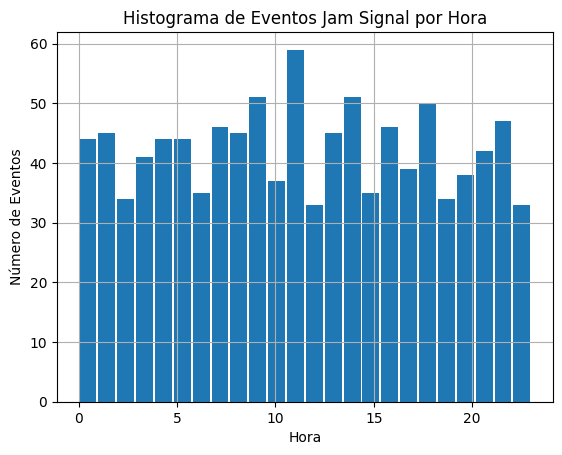

In [44]:
## Questão 1

# Quantos sensores aurora existem por cidade?
df_aurora = df_sensores[df_sensores['tipo'] == 'aurora']
sensores_por_cidade = df_aurora['cidade'].value_counts().reset_index()
sensores_por_cidade.columns = ['cidade', 'qtd_sensores_aurora']

# Se der um Print do resultado sai a resposta da pergunta especifica

# Quais cidades registram mais eventos jam_signal?
df_jam = df_eventos[df_eventos['tipo'] == 'jam_signal']
eventos_por_cidade = df_jam['cidade'].value_counts().reset_index()
eventos_por_cidade.columns = ['cidade', 'qtd_eventos_jam_signal']

# Se der um Print do resultado sai a resposta da pergunta especifica

# Histograma de eventos por hora
import matplotlib.pyplot as plt
df_jam.loc[:, 'hora'] = df_jam['hora'].apply(lambda x: pd.to_datetime(x, format='%H:%M:%S').hour)
df_jam['hora'].hist(bins=24, rwidth=0.9)
plt.title('Histograma de Eventos Jam Signal por Hora')
plt.xlabel('Hora')
plt.ylabel('Número de Eventos')
plt.show()


In [54]:
## Questão 2 

import pandas as pd

# Carregar o arquivo CSV (supondo que os dados estão no arquivo 'logs.csv')
df_logs = pd.read_csv('logs.csv')

# Converter a coluna 'hora' para um formato numérico de hora
df_logs['hora'] = pd.to_datetime(df_logs['hora'], format='%H:%M').dt.hour

# Filtrar os dados entre 01h e 04h
df_madrugada = df_logs[(df_logs['hora'] >= 1) & (df_logs['hora'] <= 4)]

# Agrupar por cidade e somar o volume transmitido
volume_por_cidade = df_madrugada.groupby("cidade")["volume_transmitido_mb"].sum()

# Identificar a cidade com maior volume transmitido
cidade_mais_volume = volume_por_cidade.idxmax()
volume_mais_transmitido = volume_por_cidade.max()

print(f"A cidade que mais transmite dados entre 01h e 04h é {cidade_mais_volume} com {volume_mais_transmitido} MB.")


A cidade que mais transmite dados entre 01h e 04h é Skopje com 4182.15 MB.


Cidade que mais transmite dados entre 01h e 04h: Skopje
      cidade  volume_transmitido_mb
0  Podgorica              13.431111
1   Pristina              15.568322
2   Sarajevo              13.158509
3     Skopje              13.987124
4     Tirana              15.466560


C:\Users\Griba\AppData\Local\Temp\ipykernel_8852\444099256.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




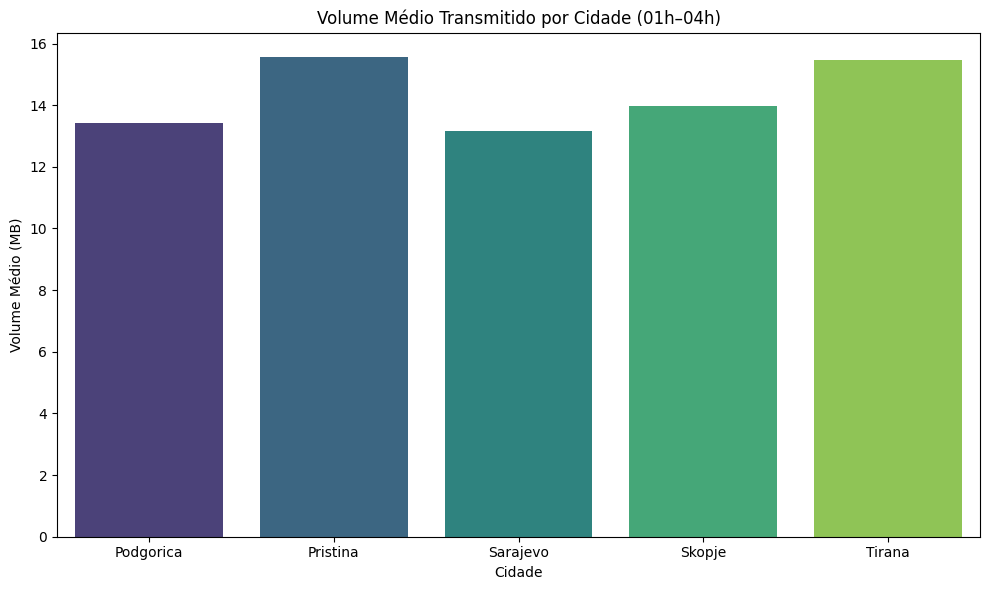

In [55]:
## Questão 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df_logs = pd.read_csv("logs.csv")  # Substitua pelo caminho correto, se necessário

# Extrair a hora como número inteiro
df_logs['hora_num'] = df_logs['hora'].str[:2].astype(int)

# Filtrar o intervalo entre 01h e 04h
df_madrugada = df_logs[(df_logs['hora_num'] >= 1) & (df_logs['hora_num'] <= 4)]

# Cidade que mais transmite dados entre 01h e 04h
cidade_mais_volume = df_madrugada.groupby("cidade")["volume_transmitido_mb"].sum().idxmax()
print("Cidade que mais transmite dados entre 01h e 04h:", cidade_mais_volume)

# Volume médio por cidade nesse horário
volume_medio = df_madrugada.groupby("cidade")["volume_transmitido_mb"].mean().reset_index()
print(volume_medio)

# Gráfico de barras com volume médio por cidade
plt.figure(figsize=(10, 6))
sns.barplot(data=volume_medio, x="cidade", y="volume_transmitido_mb", palette="viridis")
plt.title("Volume Médio Transmitido por Cidade (01h–04h)")
plt.xlabel("Cidade")
plt.ylabel("Volume Médio (MB)")
plt.tight_layout()
plt.show()


In [ ]:
# Contar a quantidade de sensores 'aurora' por cidade
df_sensores_aurora = df_sensores[df_sensores['tipo'] == 'aurora'].groupby('cidade').size().reset_index(name='qtd_sensores_aurora')

# Verifique se a contagem foi feita corretamente
print(df_sensores_aurora.head())


      cidade  qtd_sensores_aurora
0  Podgorica                    6
1   Pristina                    7
2   Sarajevo                    3
3     Skopje                    5
4     Tirana                    7


In [20]:
# Juntar dados de sensores com coordenadas
df_sensores_coordenadas = pd.merge(df_sensores_aurora, df_coordenadas, on='cidade')

# Verifique a junção
print(df_sensores_coordenadas.head())


      cidade  qtd_sensores_aurora  latitude  longitude
0  Podgorica                    6   42.4304    19.2594
1   Pristina                    7   42.6629    21.1655
2   Sarajevo                    3   43.8563    18.4131
3     Skopje                    5   41.9981    21.4254
4     Tirana                    7   41.3275    19.8189


In [ ]:
## QUESTÃO 3

import plotly.express as px
import plotly.io as pio

# Forçar renderização no navegador
pio.renderers.default = 'browser'

# Criar mapa interativo
fig = px.scatter_mapbox(df_sensores_coordenadas, lat="latitude", lon="longitude", size="qtd_sensores_aurora", 
                        hover_name="cidade", hover_data=["qtd_sensores_aurora"],
                        mapbox_style="carto-positron", title="Sensores Aurora por Cidade")

# Exibir o gráfico
fig.show()




In [ ]:
### Questoes 4 e 5 tive problemas com o acesso do mongo db